# RNS to Binary Conversion Using a Neural Network
This notebook is for the (attempted) conversion of Residue Number System (RNS) to binary representation using a neural network. In this notebook, several methods are attempted for this conversion. Two input representations are attempted as well as regressions and binary classification models. Unfortunately, none were successful.

Now for the actual code. First, we'll import some necessary libraries.

In [0]:
# SKLearn for the neural networks, both regression and classification
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split

# Libraries for data manipulation and representation
import sys, math, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.style.use('ggplot')

### Global Variables
Here we initialize two global variables: 
- `rns_numbers`: a list of the relatively prime numbers for the residue system. A common choice is [8,7,5,3], but other variations are available and commented out.
- `possible`: the total number of unique digits the RNS can represent which is calculated as all the `rns_numbers` multiplied together. 


In [16]:
# rns_numbers = [13,11,7,5,3]
# rns_numbers = [8,7,5,3]
rns_numbers = [8,7,5]
# rns_numbers = [5,3,2]
possible = np.prod(rns_numbers)
print('Number of possible outputs with this RNS:', possible)

Number of possible outputs with this RNS: 280


### Helper Functions
Here we have a few helper functions for conversions and graphing purposes.

In [0]:
# Takes an integer number and converts it to the RNS representation of that number
# Inputs:
#   - n: integer number to convert
#   - rns_numbers: list of the relatively prime numbers used for the RNS
# Returns: list of the moduli of the digit passed and each RNS number
def dec_to_rns(n, rns_numbers):
  
  if n == 0:
    return [0] * len(rns_numbers)

  # Compute each moduli 
  result = []
  for rns_number in rns_numbers:
    result.append(n % rns_number)

  return result

# Takes a list of residues and converts it to a list of ones and zeros
# Inputs:
#   - rns: list of resiudes
#   - rns_numbers: list of the relatively prime numbers used for the RNS
# Returns: list of bits to represent the RNS number
def rns_bits(rns, rns_numbers):
  bits = []
  for i in range(len(rns)):
    n_digits = math.ceil(math.log2(rns_numbers[i]))
    for j in range(n_digits-1,-1,-1):
      if (rns[i] >> j) & 1:
        bits.append(1)
      else:
        bits.append(0)
  return bits

# Takes a trained model and returns a matplotlib graph of the loss graph
def loss_graph(model):
  loss_list = model.loss_curve_
  plt.figure()
  plt.plot(np.arange(len(loss_list)), loss_list)
  plt.xlabel("Time in epochs")
  plt.ylabel("Loss")
  ax = plt.gca()
  ax.set_ylim(bottom=0)
  
  return plt

### Conversion List and Graph
This set of code shows a list of a simple residue system ([5,3,2]) and the its 30 unique representations. It also shows a graph of the residue numbers with each moduli being its own axis.

[0, 0, 0]
[1, 1, 1]
[2, 2, 0]
[3, 0, 1]
[4, 1, 0]
[0, 2, 1]
[1, 0, 0]
[2, 1, 1]
[3, 2, 0]
[4, 0, 1]
[0, 1, 0]
[1, 2, 1]
[2, 0, 0]
[3, 1, 1]
[4, 2, 0]
[0, 0, 1]
[1, 1, 0]
[2, 2, 1]
[3, 0, 0]
[4, 1, 1]
[0, 2, 0]
[1, 0, 1]
[2, 1, 0]
[3, 2, 1]
[4, 0, 0]
[0, 1, 1]
[1, 2, 0]
[2, 0, 1]
[3, 1, 0]
[4, 2, 1]


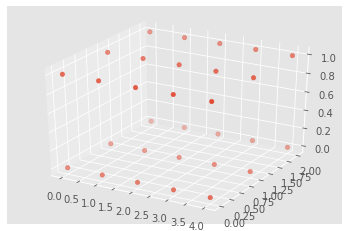

In [18]:
rns_list = []
for i in range(30):
  rns = dec_to_rns(i, [5,3,2])
  rns_list.append(rns)
  # print('{}\t{}'.format(i, rns))
  print('{}'.format(rns))

rns_list = np.asarray(rns_list)
X = rns_list[:,0]
Y = rns_list[:,1]
Z = rns_list[:,2]

# Graph all RNS conversions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z)

### First Neural Net: Scalar Input Regression
The first neural network we will try will be a regression with scalar inputs. For example, if our RNS moduli are [5,3,2] and the RNS representation (input) is	[3, 2, 1], the output should be 23. The model is trained on 80% of every possible number in the RNS system. Unfortunately, this model doesn't even come close to converging. Currently, the model is configured for hidden layers of (32,32,32,32). Other configurations were tried but don't seem to aid in convergence.

Training X:
     8  7  5
85   5  1  0
130  2  4  0
151  7  4  1
97   1  6  2
134  6  1  4
..  .. .. ..
47   7  5  2
22   6  1  2
211  3  1  1
17   1  3  2
54   6  5  4

[224 rows x 3 columns] 


Training Y:
85      85
130    130
151    151
97      97
134    134
      ... 
47      47
22      22
211    211
17      17
54      54
Name: index, Length: 224, dtype: int64 

Predicted: [101.65949635]
Correct: 50


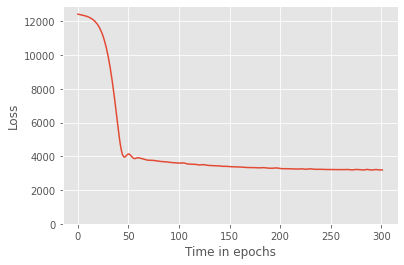

In [19]:
# Generate all possible data for the RNS system
rns_list = []
for i in range(possible):
  rns = dec_to_rns(i, rns_numbers)
  rns_list.append([i]+rns)
rns_list = np.asarray(rns_list)

# Convert it to a pandas dataframe
d = {'index': rns_list[:,0]}
i = 1
for rns_number in rns_numbers:
  d[str(rns_number)] = rns_list[:,i]
  i += 1
df = pd.DataFrame(data=d)

# Do a test/train split where the training data is 80% of the dataset
# y: scalar output of regression
# x: list of scalar inputs
train, test = train_test_split(df, test_size=0.2)
print('Training X:\n'+str(train.iloc[:, 1:len(rns_numbers)+1]),'\n')
print('\nTraining Y:\n'+str(train['index']),'\n')
x_train = train.iloc[:, 1:len(rns_numbers)+1].values
y_train = train['index'].to_numpy()
x_test = test.iloc[:, 1:len(rns_numbers)+1].values
y_test = test['index'].to_numpy()

# Configure and train network
hidden_layers = (32,32,32,32)
model = MLPRegressor(hidden_layer_sizes=hidden_layers, max_iter=1000)
model.fit(x_train, y_train)

# Show loss graph
loss_graph(model)

# Print sample 
print('Predicted:', model.predict([x_test[0]]))
print('Correct:', y_test[0])

### Second Neural Net: Binary Input Regression
The second neural network we will try will be a regression with binary inputs. For example, if our RNS moduli are [5,3,2] and the RNS representation is	[3, 2, 1], then the actual input to the network will be [0,1,1,1,0,1]. The output should still be 23. Like the previous, this model is trained on 80% of every possible number in the RNS system with hidden layers of (32,32,32,32). While this model usually comes *close* (much closer than the previous network) to converging, it still never does. It's predictions are still wildly off. 

Training X:
     8  7  6  5  4  3  2  1  0
101  1  0  1  0  1  1  0  0  1
63   1  1  1  0  0  0  0  1  1
17   0  0  1  0  1  1  0  1  0
131  0  1  1  1  0  1  0  0  1
113  0  0  1  0  0  1  0  1  1
..  .. .. .. .. .. .. .. .. ..
70   1  1  0  0  0  0  0  0  0
42   0  1  0  0  0  0  0  1  0
277  1  0  1  1  0  0  0  1  0
207  1  1  1  1  0  0  0  1  0
125  1  0  1  1  1  0  0  0  0

[224 rows x 9 columns] 


Training Y:
101    101
63      63
17      17
131    131
113    113
      ... 
70      70
42      42
277    277
207    207
125    125
Name: index, Length: 224, dtype: int64 

Predicted: [172.41664254]
Correct: 192


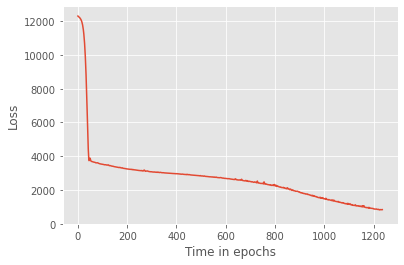

In [20]:
# Generate all possible data for the RNS system
rns_list = []
for i in range(possible):
  rns = dec_to_rns(i, rns_numbers)
  rns_list.append([i]+rns_bits(rns, rns_numbers))
rns_list = np.asarray(rns_list)

# Convert it to a pandas dataframe
d = {'index': rns_list[:,0]}
i = 1
n_bits = len(rns_bits(dec_to_rns(i, rns_numbers), rns_numbers))
for bit in range(n_bits):
  bit_n = n_bits - i
  d[str(bit_n)] = rns_list[:,i]
  i += 1
df = pd.DataFrame(data=d)

# Do a test/train split where the training data is 80% of the dataset
# y: scalar output of regression
# x: list of bit inputs
train, test = train_test_split(df, test_size=0.2)
print('Training X:\n'+str(train.iloc[:, 1:]),'\n')
print('\nTraining Y:\n'+str(train['index']),'\n')
x_train = train.iloc[:, 1:].values
y_train = train['index'].to_numpy()
x_test = test.iloc[:, 1:].values
y_test = test['index'].to_numpy()

# Configure and train network
hidden_layers = (32,32,32,32)
model = MLPRegressor(hidden_layer_sizes=hidden_layers, max_iter=100000)
model.fit(x_train, y_train)

# Show loss graph
loss_graph(model)

# Print sample 
print('Predicted:', model.predict([x_test[0]]))
print('Correct:', y_test[0])

### Third Neural Net: Binary Input Classification
For this last neural network we use the same bitwise input structure, but instead of trying to do a regression output we'll create a new neural network classifier for *each binary digit of the output*. Therefore, if the max possible output of the RNS in decimal form has 8 binary digits, then we will need 8 models: one for each of the binary digits. 

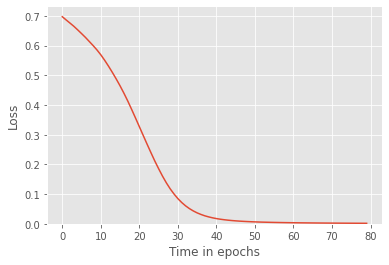

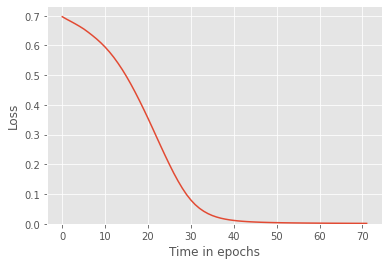

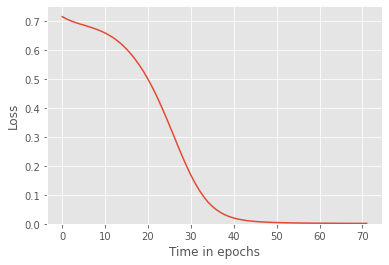

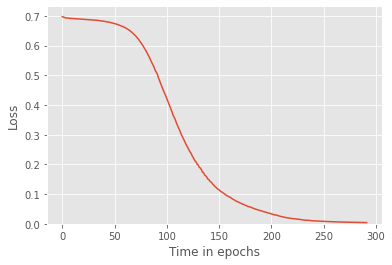

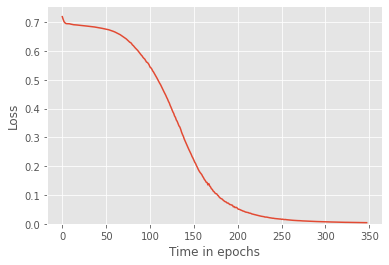

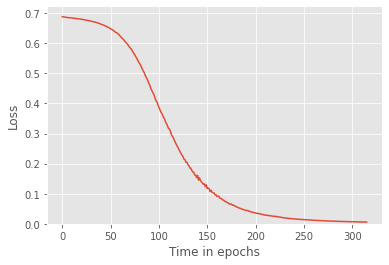

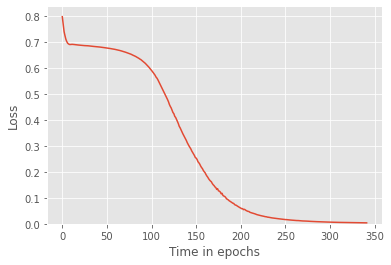

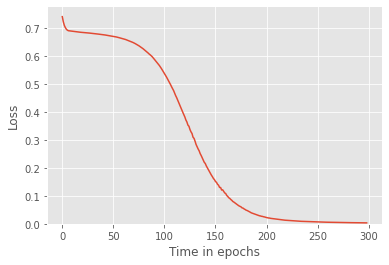

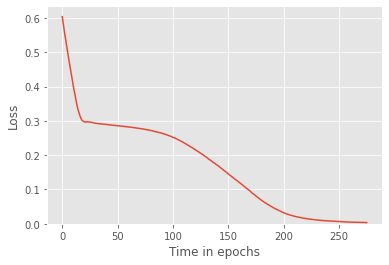

In [21]:
# Trains a model for a certain binary digit
# Input:
#   - b: which binary digit to train for
#   - rns_numbers: list of the relatively prime numbers used for the RNS
# Output: a classifier model used to predict a single digit of an RNS->binary conversion
def single_bit_classifier(b, rns_numbers):
  # Generate all possible data for the RNS system
  rns_list = []
  for i in range(possible):
    rns = dec_to_rns(i, rns_numbers)
    rns_list.append([i]+rns_bits(rns, rns_numbers))
  rns_list = np.asarray(rns_list)

  # Convert it to a pandas dataframe
  d = {'index': rns_list[:,0]}
  i = 1
  n_bits = len(rns_bits(dec_to_rns(i, rns_numbers), rns_numbers))
  for bit in range(n_bits):
    bit_n = n_bits - i
    d[str(bit_n)] = rns_list[:,i]
    i += 1
  d['index'] = (d['index'] >> b) & 1 # Output is only a specific digit n of the binary representation
  df = pd.DataFrame(data=d)

  # Do a test/train split where the training data is 80% of the dataset
  # y: single binary output of binary bit b
  # x: list of bit inputs
  # train, test = train_test_split(df, test_size=0.2)
  x_train = df.iloc[:, 1:].values
  y_train = df['index'].to_numpy()
  # x_test = test.iloc[:, 1:].values
  # y_test = test['index'].to_numpy()

  # Configure and train model
  hidden_layers = (32,32,32,32)
  model = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=100000)
  model.fit(x_train, y_train)

  # Return model
  return model

# Train a model for each digit in the binary output
bin_bits = math.ceil(math.log2(possible))
models = []
for i in range(bin_bits):
  model = single_bit_classifier(i, rns_numbers)
  loss_graph(model)
  models.append(model)

### Classification Model Results
The third classification neural network model was the closest to being successful. Each bit model is trained on the *full* data set. This is essentially using the neural architecture as a memory network. With the small RNS system of [8,7,5,3], the model is able to convert the RNS numbers to binary with 100% accuracy. Unfortunately, this method does not scale well. With a larger system of [13,11,7,5,3], only 76% of the conversions are succesful. While this is a novel method for RNS conversion, it ultimately is not viable. 

In [22]:
def check(n, models, p=False):
  to_check = rns_bits(dec_to_rns(n, rns_numbers), rns_numbers)
  result = ''
  for model in models[::-1]:
    predicted = model.predict([to_check])
    result += str(predicted[0])
  if p: print('Predicted:',result)
  s = '{' + '0:0{}b'.format(bin_bits) + '}'
  correct = s.format(n)
  if p: print('Correct:   '+s.format(n))
  
  if correct == result: 
    if p: print('RNS to Bin successful\n')
    return (True, 0)

  bit_diff = 0
  for i in range(len(result)):
    if result[i] != correct[i]: bit_diff += 1

  if p: print('Num. wrong bits:', bit_diff)
  if p: print()
  return (False, bit_diff)

for i in range(10):
  check(random.randint(0,possible-1), models, p=True)

correct = 0
incorrect = 0
bit_errors = []
for i in range(possible):
  result = check(i, models)
  if result[0]:
    correct += 1
  else:
    incorrect += 1
    bit_errors.append(result[1])

print('Percent correct:  ', (correct/possible)*100)
print('Precent incorrect:', (incorrect/possible)*100)
print('Average bit error:', (sum(bit_errors)/possible))

Predicted: 001101111
Correct:   001101111
RNS to Bin successful

Predicted: 000100111
Correct:   000100111
RNS to Bin successful

Predicted: 011001010
Correct:   011001010
RNS to Bin successful

Predicted: 011110001
Correct:   011110001
RNS to Bin successful

Predicted: 000110011
Correct:   000110011
RNS to Bin successful

Predicted: 001010010
Correct:   001010010
RNS to Bin successful

Predicted: 001011011
Correct:   001011011
RNS to Bin successful

Predicted: 010011001
Correct:   010011001
RNS to Bin successful

Predicted: 011000011
Correct:   011000011
RNS to Bin successful

Predicted: 010100110
Correct:   010100110
RNS to Bin successful

Percent correct:   100.0
Precent incorrect: 0.0
Average bit error: 0.0


### RNS conversion the *right* way
Since the neural network models failed for the RNS conversion, we'll do the conversion the classic algorithmic way: using the Chinese remainder theorem. [Here](https://www.youtube.com/watch?v=zIFehsBHB8o) is a great link for understanding the theorem.

In [23]:
# Converts a set of RNS numbers to a proper binary number
# Result = sum(bi*Ni*xi) % N
def rns_to_bin(b, n):
  # Returns the modular inverse of a number
  # Input:
  #   a: a number
  #   n: modulus
  # Returns: modular inverse or -1 if there is no inverse
  def inverse(a, n):
    a = a % n
    for i in range(n):
      if (a*i) % n == 1:
        return i
    return -1

  N = np.prod(n)
  result = 0
  # Partial results and sum them together
  for i in range(len(n)):
    Ni = N // n[i]
    xi =  inverse(Ni, n[i])
    s = b[i] * Ni * xi
    result += s
  return result % N # Compute final result

print('Example of RNS conversion of decimal 78')
print('Moduli: [8,7,5]')
print('Residues: [78%8, 78%7, 78%5] = [6,1,3]') 
moduli = [8,7,5]
residues = [6,1,3] 
result = rns_to_bin(residues, moduli)
print('Result:', result)

Example of RNS conversion of decimal 78
Moduli: [8,7,5]
Residues: [78%8, 78%7, 78%5] = [6,1,3]
Result: 78
